In [4]:
import pandas as pd
import numpy as np

# Checking unWISE x Legacy dr10

In [2]:
data = pd.read_table("/home/mariko/Research/Projects/qucats_paper/_survey/referee/SPLUS_unWISE2_legacydr101_field_041.txt", sep=",")

In [33]:
#how many objects with unWISE match?
len(data.dropna(subset=["RAdeg"], inplace=False))

26790

In [34]:
#how many objects with Legacy match?
len(data.dropna(subset=["Separation"], inplace=False))

41349

In [35]:
l10_matches = data.dropna(subset=["Separation"], inplace=False)
unwise_matches = data.dropna(subset=["RAdeg"], inplace=False)

In [27]:
len(data)

51114

In [43]:
data.loc[data["FW1"]==0, "FW1"] = 0.001
data.loc[data["FW2"]==0, "FW2"] = 0.001

data["W1_MAG_unWISE"] = -2.5 * np.log10(data["FW1"]) + 22.5 +2.699
data["W2_MAG_unWISE"] = -2.5 * np.log10(data["FW2"]) + 22.5 +3.339
# data["e_W1_MAG"] = 2.5 * data["e_FW1"] / (data["FW1"] * np.log(10))
# data["e_W2_MAG"] = 2.5  * data["e_FW1"] / (data["FW2"] * np.log(10)) 

# insert missing value
data['W1_MAG_unWISE'].fillna(np.NaN, inplace=True)
data['W2_MAG_unWISE'].fillna(np.NaN, inplace=True)
data.loc[data["W1_MAG_unWISE"]>25, "W1_MAG_unWISE"] = np.NaN
data.loc[data["W2_MAG_unWISE"]>25, "W2_MAG_unWISE"] = np.NaN

data.loc[data["flux_w1"]==0, "flux_w1"] = 0.001
data.loc[data["flux_w2"]==0, "flux_w2"] = 0.001

data["W1_MAG_DESI"] = -2.5 * np.log10(data["flux_w1"]) + 22.5
data["W2_MAG_DESI"] = -2.5 * np.log10(data["flux_w2"]) + 22.5
# data["e_W1_MAG"] = 2.5 * data["e_FW1"] / (data["FW1"] * np.log(10))
# data["e_W2_MAG"] = 2.5  * data["e_FW1"] / (data["FW2"] * np.log(10)) 

# insert missing value
data['W1_MAG_DESI'].fillna(np.NaN, inplace=True)
data['W2_MAG_DESI'].fillna(np.NaN, inplace=True)
data.loc[data["W1_MAG_DESI"]>25, "W1_MAG_DESI"] = np.NaN
data.loc[data["W2_MAG_DESI"]>25, "W2_MAG_DESI"] = np.NaN

/home/mariko/anaconda3/envs/sqg_idr5/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
# W1

print(len(data.dropna(subset=["W1_MAG_unWISE"], inplace=False)))
print(len(data.dropna(subset=["W1_MAG_DESI"], inplace=False)))
print(len(data.dropna(subset=["W1_MAG_DESI"], inplace=False).dropna(subset=["W1_MAG_unWISE"], inplace=False)))

26688
38261
25958


In [39]:
print(l10_matches[l10_matches["W1_MAG_DESI"].isna()]["W1_MAG_unWISE"].isna().sum())
print()
print(l10_matches[~l10_matches["W1_MAG_DESI"].isna()]["W1_MAG_unWISE"].isna().sum())
print()
print(l10_matches[~l10_matches["W1_MAG_unWISE"].isna()]["W1_MAG_DESI"].isna().sum())

2945

12303

143


In [40]:
print(unwise_matches[unwise_matches["W1_MAG_DESI"].isna()]["W1_MAG_unWISE"].isna().sum())
print()
print(unwise_matches[~unwise_matches["W1_MAG_DESI"].isna()]["W1_MAG_unWISE"].isna().sum())
print()
print(unwise_matches[~unwise_matches["W1_MAG_unWISE"].isna()]["W1_MAG_DESI"].isna().sum())

22

80

730


/tmp/ipykernel_76555/3305023330.py:12: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = kde.gaussian_kde([matches_only["W1_MAG_unWISE"], matches_only["W1_MAG_unWISE"]-matches_only["W1_MAG_DESI"]])


(8.0, 22.0)

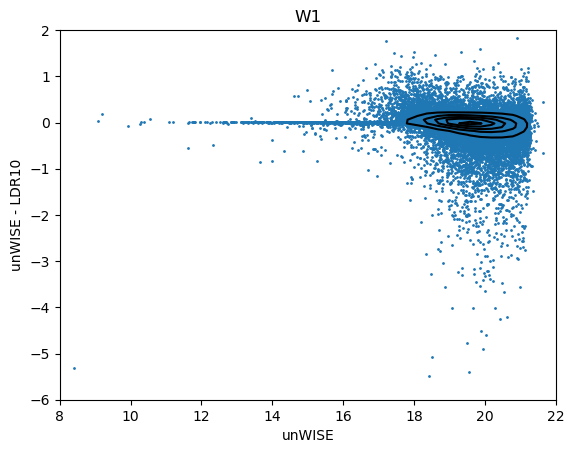

In [64]:
import matplotlib.pyplot as plt

matches_only = data.dropna(subset=["W1_MAG_DESI"], inplace=False).dropna(subset=["W1_MAG_unWISE"], inplace=False)

plt.scatter(matches_only["W1_MAG_unWISE"], matches_only["W1_MAG_unWISE"]-matches_only["W1_MAG_DESI"], s=1)
plt.xlabel("unWISE")
plt.ylabel("unWISE - LDR10")
plt.title("W1")

# add contours
from scipy.stats import kde
kde = kde.gaussian_kde([matches_only["W1_MAG_unWISE"], matches_only["W1_MAG_unWISE"]-matches_only["W1_MAG_DESI"]])
xgrid = np.linspace(-8, 22, 100)
ygrid = np.linspace(-6, 2, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
Z = Z.reshape(Xgrid.shape)
CS = plt.contour(Xgrid, Ygrid, Z, levels=5, colors="black")
CS.collections[0].remove()
plt.xlim(8,22)



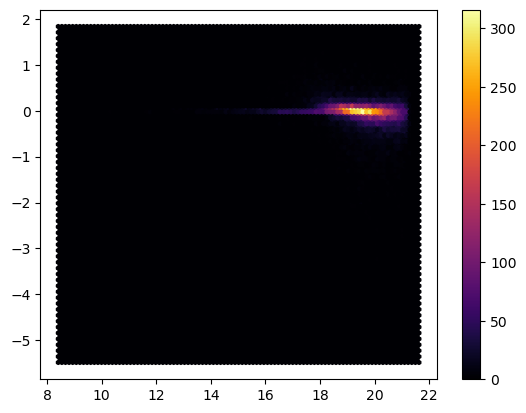

In [49]:
#density map
plt.hexbin(data["W1_MAG_unWISE"], data["W1_MAG_unWISE"]-data["W1_MAG_DESI"], gridsize=100, cmap="inferno")
plt.colorbar()